# Assignment Week III: Ploynomial Regression

#### In this notebook you will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic.

### Objectives:

1. Write a function to take an an array and a degree and return an data frame where each column is the array to a polynomial value up to the total degree.
2. Use a plotting tool (e.g. matplotlib) to visualize polynomial regressions
3. Use a plotting tool (e.g. matplotlib) to visualize the same polynomial degree on different subsets of the data
4. Use a validation set to select a polynomial degree
5. Assess the final fit using test data


In [89]:
import pandas as pd
import numpy as np 
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [90]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

## Load the Sales Data

Load data from csv/xlsx files

In [192]:
sales = pd.read_excel("kc_house_data.xlsx")

House_Sales_set1 = pd.read_excel("kc_house_set_1_data.xlsx")

House_Sales_set2 = pd.read_excel("kc_house_set_2_data.xlsx")

House_Sales_set3 = pd.read_excel("kc_house_set_3_data.xlsx")

House_Sales_set4 = pd.read_excel("kc_house_set_4_data.xlsx")


### Writing a function that adds powers of a feature to columns of a data frame

In [92]:
data_array = pd.DataFrame([1., 2., 3.])

data_array_cubed = data_array.apply(lambda x: x**3)

print(data_array)
print(data_array_cubed)

ex_sframe = pd.DataFrame()   
ex_sframe['power_1'] = data_array

print(ex_sframe)  
   

     0
0  1.0
1  2.0
2  3.0
      0
0   1.0
1   8.0
2  27.0
   power_1
0      1.0
1      2.0
2      3.0


### Writing a function called ‘polynomial_dataframe’ which accepts an array ‘feature’ and a maximal ‘degree’
This function returns an data frame (e.g. dataFrame) with the first column equal to ‘feature’ and the remaining columns equal to ‘feature’ to increasing integer powers up to ‘degree’.

In [93]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature.apply(lambda x: x ** power)
    return poly_dataframe

In [94]:
print (polynomial_dataframe(data_array, 2))

   power_1  power_2
0      1.0      1.0
1      2.0      4.0
2      3.0      9.0


### Data pre-processing
For plotting purposes (connecting the dots), you'll need to sort by the values of sqft_living

In [103]:
sales = sales.sort_values(['sqft_living', 'price'])
sales
House_Sales_set1 = House_Sales_set1.sort_values(['sqft_living', 'price'])
House_Sales_set1


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,8658300340,20140523T000000,80000,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
1,1352300580,20141114T000000,247000,1,1.00,460,4120,1.0,0,0,...,4,460,0,1937,0,98055,47.4868,-122.199,990,4120
2,1320069249,20141020T000000,192500,1,1.00,470,63737,1.0,0,2,...,5,470,0,1924,0,98022,47.2163,-121.984,1350,46762
3,1437500015,20140709T000000,150000,3,0.75,490,38500,1.5,0,0,...,5,490,0,1959,0,98014,47.7112,-121.315,800,18297
4,859000110,20141002T000000,125000,1,1.00,500,7440,1.0,0,0,...,5,500,0,1928,0,98106,47.5252,-122.362,1350,7440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5399,8907500070,20150413T000000,5350000,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
5400,1247600105,20141020T000000,5110800,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
5401,2303900035,20140611T000000,2888000,5,6.25,8670,64033,2.0,0,4,...,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021
5402,6762700020,20141013T000000,7700000,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


### Polynomial Degree 1
Let's start with a degree 1 polynomial using 'sqft_living' (i.e. a line) to predict 'price' and then plot.

In [104]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price'] # add price to the data since it's the target
type (poly1_data)
poly1_data.head()

,power_1,price
19452,290,142000
15381,370,276000
860,380,245000
18379,384,265000
4868,390,228000


## Creating Train and Test data
PolynomialFeatures() function in Scikit-learn library, drives a new feature sets from the original feature set. The LinearRegression() function is used to fit a model.

In [105]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(poly1_data[['power_1']])
train_y = np.asanyarray(poly1_data[['price']])
regr.fit(train_x,train_y)
print ('Coefficients:', regr.coef_)
print ('Intercept:', regr.intercept_)

Coefficients: [[280.6235679]]
Intercept: [-43580.74309447]


## Evaluation

In [106]:
y_hat1_train = regr.predict(poly1_data[['power_1']].values)
train_x = np.asanyarray(poly1_data[['power_1']].values)
train_y = np.asanyarray(poly1_data[['price']].values)
print("Residual sum of Squares: %.2f" % np.mean((y_hat1_train-train_y) ** 2))
print("Variance Score: %.2f" % regr.score(train_x,train_y))

Residual sum of Squares: 68351286833.04
Variance Score: 0.49


## Visualizing

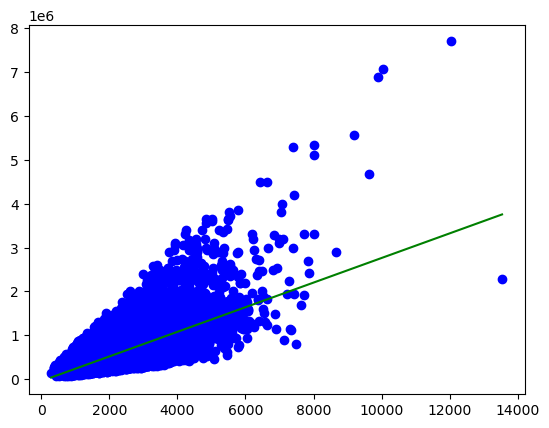

In [107]:
fig = plt.figure() 
plt.scatter(poly1_data.power_1, poly1_data.price, color='blue')
plt.plot(poly1_data.power_1, regr.coef_[0][0]*poly1_data.power_1 + regr.intercept_[0], '-g')


### Polynomial Degree 2
Let's start with a degree 2 polynomial using 'sqft_living' (i.e. a line) to predict 'price' and then plot.

In [108]:
poly2_data = polynomial_dataframe(sales['sqft_living'], 2)
poly2_data['price'] = sales['price'] # add price to the data since it's the target
type (poly2_data)
poly2_data.head()

,power_1,power_2,price
19452,290,84100,142000
15381,370,136900,276000
860,380,144400,245000
18379,384,147456,265000
4868,390,152100,228000


## Creating Train and Test data
PolynomialFeatures() function in Scikit-learn library, drives a new feature sets from the original feature set. The LinearRegression() function is used to fit a model.

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(poly2_data[['power_1','power_2']])
train_y = np.asanyarray(poly2_data[['price']])
regr.fit(train_x,train_y)
print ('Coefficients:', regr.coef_)
print ('Intercept:', regr.intercept_)
print ('Power_1:', regr.coef_[0,0])
print ('Power_2:', regr.coef_[0,1])

## Evaluation

In [110]:
y_hat1_train = regr.predict(poly2_data[['power_1','power_2']].values)
train_x = np.asanyarray(poly2_data[['power_1','power_2']].values)
train_y = np.asanyarray(poly2_data[['price']].values)
print("Residual sum of Squares: %.2f" % np.mean((y_hat1_train-train_y) ** 2))
print("Variance Score: %.2f" % regr.score(train_x,train_y))

Residual sum of Squares: 62975083210.97
Variance Score: 0.53


## Visualizing

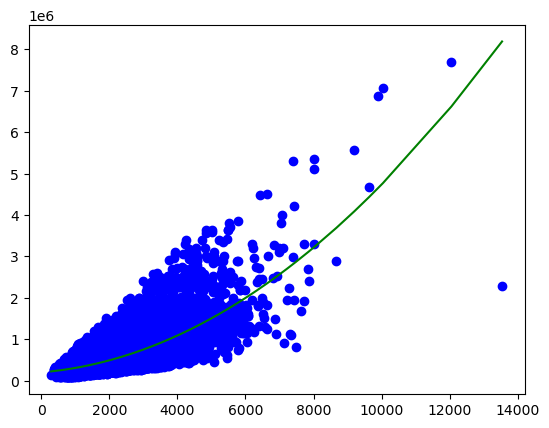

In [111]:
fig = plt.figure() 
plt.scatter(poly2_data.power_1, poly2_data.price, color='blue')
plt.plot(poly2_data.power_1, regr.coef_[0][0]*poly2_data.power_1 + regr.coef_[0][1]*poly2_data.power_2  + regr.intercept_[0], '-g')

### Polynomial Degree 3
Let's start with a degree 3 polynomial using 'sqft_living' (i.e. a line) to predict 'price' and then plot.

In [112]:
poly3_data = polynomial_dataframe(sales['sqft_living'], 3)
poly3_data['price'] = sales['price'] # add price to the data since it's the target
type (poly3_data)
poly3_data.head()

,power_1,power_2,power_3,price
19452,290,84100,24389000,142000
15381,370,136900,50653000,276000
860,380,144400,54872000,245000
18379,384,147456,56623104,265000
4868,390,152100,59319000,228000


## Creating Train and Test data
PolynomialFeatures() function in Scikit-learn library, drives a new feature sets from the original feature set. The LinearRegression() function is used to fit a model.

In [113]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(poly3_data[['power_1','power_2','power_3']])
train_y = np.asanyarray(poly3_data[['price']])
regr.fit(train_x,train_y)
print ('Coefficients:', regr.coef_)
print ('Intercept:', regr.intercept_)
print ('Power_1:', regr.coef_[0,0])
print ('Power_2:', regr.coef_[0,1])
print ('Power_3:', regr.coef_[0,2])

Coefficients: [[-9.01819864e+01  8.70465089e-02 -3.84055260e-06]]
Intercept: [336819.74822146]
Power_1: -90.18198644344669
Power_2: 0.08704650885785181
Power_3: -3.840552600323433e-06


## Evaluation

In [114]:
y_hat1_train = regr.predict(poly3_data[['power_1','power_2','power_3']].values)
train_x = np.asanyarray(poly3_data[['power_1','power_2','power_3']].values)
train_y = np.asanyarray(poly3_data[['price']].values)
print("Residual sum of Squares: %.2f" % np.mean((y_hat1_train-train_y) ** 2))
print("Variance Score: %.2f" % regr.score(train_x,train_y))

Residual sum of Squares: 62131188192.98
Variance Score: 0.54


### Polynomial Degree 15
Let's start with a degree 15 polynomial using 'sqft_living' (i.e. a line) to predict 'price' and then plot.

In [167]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
poly15_data['price'] = sales['price'] # add price to the data since it's the target
type (poly15_data)
poly15_data.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15,price
19452,290,84100,24389000,7072810000,2051114900000,594823321000000,172498763090000000,50024641296100000000,14507145975869000000000,4207072333002010000000000,1220050976570582900000000000,353814783205469041000000000000,102606287129586021890000000000000,29755823267579946348100000000000000,8629188747598184440949000000000000000,142000
15381,370,136900,50653000,18741610000,6934395700000,2565726409000000,949318771330000000,351247945392100000000,129961739795077000000000,48085843724178490000000000,17791762177946041300000000000,6582952005840035281000000000000,2435692242160813053970000000000000,901206129599500829968900000000000000,333446267951815307088493000000000000000,276000
860,380,144400,54872000,20851360000,7923516800000,3010936384000000,1144155825920000000,434779213849600000000,165216101262848000000000,62782118479882240000000000,23857205022355251200000000000,9065737908494995456000000000000,3444980405228098273280000000000000,1309092553986677343846400000000000000,497455170514937390661632000000000000000,245000
18379,384,147456,56623104,21743271936,8349416423424,3206175906594816,1231171548132409344,472769874482845188096,181543631801412552228864,69712754611742420055883776,26769697770909089301459369984,10279563944029090291760398073856,3947352554507170672035992860360704,1515783380930753538061821258378510336,582060818277409358615739363217347969024,265000
4868,390,152100,59319000,23134410000,9022419900000,3518743761000000,1372310066790000000,535200926048100000000,208728361158759000000000,81404060851916010000000000,31747583732247243900000000000,12381557655576425121000000000000,4828807485674805797190000000000000,1883234919413174260904100000000000000,734461618571137961752599000000000000000,228000


## Creating Train and Test data
PolynomialFeatures() function in Scikit-learn library, drives a new feature sets from the original feature set. The LinearRegression() function is used to fit a model.

In [168]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(poly15_data[['power_1','power_2','power_3','power_4','power_5','power_6','power_7','power_8','power_9','power_10','power_11','power_12','power_13','power_14','power_15']])
train_y = np.asanyarray(poly15_data[['price']])
regr.fit(train_x,train_y)
print ('Coefficients:', regr.coef_)
print ('Intercept:', regr.intercept_)
print ('Power_1:', regr.coef_[0,0])
print ('Power_2:', regr.coef_[0,1])
print ('Power_3:', regr.coef_[0,2])
print ('Power_4:', regr.coef_[0,3])
print ('Power_5:', regr.coef_[0,4])
print ('Power_6:', regr.coef_[0,5])
print ('Power_7:', regr.coef_[0,6])
print ('Power_8:', regr.coef_[0,7])
print ('Power_9:', regr.coef_[0,8])
print ('Power_10:', regr.coef_[0,9])
print ('Power_11:', regr.coef_[0,10])
print ('Power_12:', regr.coef_[0,11])
print ('Power_13:', regr.coef_[0,12])
print ('Power_14:', regr.coef_[0,13])
print ('Power_15:', regr.coef_[0,14])

Coefficients: [[ 4.56404164e-91  6.91713460e-51 -5.84668089e-56  2.78197775e-88
   1.19863929e-74  2.68575522e-71  2.26147568e-67  1.85900299e-63
   1.47144116e-59  1.09771012e-55  7.43509038e-52  4.23015578e-48
   1.61618577e-44 -2.49283826e-48  9.59718336e-53]]
Intercept: [537116.3296377]
Power_1: 4.5640416449249845e-91
Power_2: 6.917134599556091e-51
Power_3: -5.846680890183649e-56
Power_4: 2.781977746575793e-88
Power_5: 1.1986392947067807e-74
Power_6: 2.685755218899265e-71
Power_7: 2.2614756826799225e-67
Power_8: 1.8590029915832e-63
Power_9: 1.4714411550209983e-59
Power_10: 1.0977101176268778e-55
Power_11: 7.435090382167413e-52
Power_12: 4.2301557751215814e-48
Power_13: 1.6161857728331353e-44
Power_14: -2.4928382597799447e-48
Power_15: 9.597183360960396e-53


## Evaluation

In [163]:
y_hat1_train = regr.predict(poly15_data[['power_1','power_2','power_3','power_4','power_5','power_6','power_7','power_8','power_9','power_10','power_11','power_12','power_13','power_14','power_15']].values)
train_x = np.asanyarray(poly15_data[['power_1','power_2','power_3','power_4','power_5','power_6','power_7','power_8','power_9','power_10','power_11','power_12','power_13','power_14','power_15']].values)
train_y = np.asanyarray(poly15_data[['price']].values)
print("Residual sum of Squares: %.2f" % np.mean((y_hat1_train-train_y) ** 2))
print("Variance Score: %.2f" % regr.score(train_x,train_y))

Residual sum of Squares: 122528896212.35
Variance Score: 0.09


## Visualizing

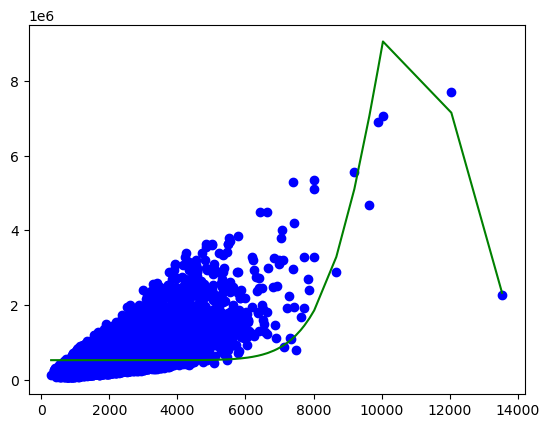

In [166]:
fig = plt.figure() 
plt.scatter(poly1_data.power_1, poly1_data.price, color='blue')
plt.plot(poly1_data.power_1, regr.coef_[0][0]*poly15_data.power_1 + regr.coef_[0][1]*poly15_data.power_2  + regr.coef_[0][2]*poly15_data.power_3 + regr.coef_[0][3]*poly15_data.power_4+  regr.coef_[0][4]*poly15_data.power_5 + regr.coef_[0][5]*poly15_data.power_6 + regr.coef_[0][6]*poly15_data.power_7 + regr.coef_[0][7]*poly15_data.power_8 + regr.coef_[0][8]*poly15_data.power_9 + regr.coef_[0][9]*poly15_data.power_10 + regr.coef_[0][10]*poly15_data.power_11 + regr.coef_[0][11]*poly15_data.power_12 + regr.coef_[0][12]*poly15_data.power_13 + regr.coef_[0][13]*poly15_data.power_14 + regr.coef_[0][14]*poly15_data.power_15 + regr.intercept_[0], '-g')

In [174]:
House_Sales_set1 = House_Sales_set1.sort_values(['sqft_living', 'price'])

In [175]:
poly15_setdata1 = polynomial_dataframe(House_Sales_set1['sqft_living'], 15)
poly15_setdata1['price'] = House_Sales_set1['price'] # add price to the data since it's the target
poly15_setdata1.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15,price
0,430,184900,79507000,34188010000,14700844300000,6321363049000000,2718186111070000000,1168820027760100000000,502592611936843000000000,216114823132842490000000000,92929373947122270700000000000,39959630797262576401000000000000,17182641242822907852430000000000000,7388535734413850376544900000000000000,3177070365797955661914307000000000000000,80000
1,460,211600,97336000,44774560000,20596297600000,9474296896000000,4358176572160000000,2004761223193600000000,922190162669056000000000,424207474827765760000000000,195135438420772249600000000000,89762301673555234816000000000000,41290658769835408015360000000000000,18993703034124287687065600000000000000,8737103395697172336050176000000000000000,247000
2,470,220900,103823000,48796810000,22934500700000,10779215329000000,5066231204630000000,2381128666176100000000,1119130473102767000000000,525991322358300490000000000,247215921508401230300000000000,116191483108948578241000000000000,54609997061205831773270000000000000,25666698618766740933436900000000000000,12063348350820368238715343000000000000000,192500
3,490,240100,117649000,57648010000,28247524900000,13841287201000000,6782230728490000000,3323293056960100000000,1628413597910449000000000,797922662976120010000000000,390982104858298804900000000000,191581231380566414401000000000000,93874803376477543056490000000000000,45998653654473996097680100000000000000,22539340290692258087863249000000000000000,150000
4,500,250000,125000000,62500000000,31250000000000,15625000000000000,7812500000000000000,3906250000000000000000,1953125000000000000000000,976562500000000000000000000,488281250000000000000000000000,244140625000000000000000000000000,122070312500000000000000000000000000,61035156250000000000000000000000000000,30517578125000000000000000000000000000000,125000


In [176]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(poly15_setdata1[['power_1','power_2','power_3','power_4','power_5','power_6','power_7','power_8','power_9','power_10','power_11','power_12','power_13','power_14','power_15']])
train_y = np.asanyarray(poly15_setdata1[['price']])
regr.fit(train_x,train_y)
print ('Coefficients:', regr.coef_)
print ('Intercept:', regr.intercept_)
print ('Power_1:', regr.coef_[0,0])
print ('Power_2:', regr.coef_[0,1])
print ('Power_3:', regr.coef_[0,2])
print ('Power_4:', regr.coef_[0,3])
print ('Power_5:', regr.coef_[0,4])
print ('Power_6:', regr.coef_[0,5])
print ('Power_7:', regr.coef_[0,6])
print ('Power_8:', regr.coef_[0,7])
print ('Power_9:', regr.coef_[0,8])
print ('Power_10:', regr.coef_[0,9])
print ('Power_11:', regr.coef_[0,10])
print ('Power_12:', regr.coef_[0,11])
print ('Power_13:', regr.coef_[0,12])
print ('Power_14:', regr.coef_[0,13])
print ('Power_15:', regr.coef_[0,14])

Coefficients: [[ 3.05794168e-90 -1.69394947e-49 -5.61767568e-55 -4.97841222e-60
   3.23082736e-74  1.10358333e-70  8.37724029e-67  6.23411957e-63
   4.49156442e-59  3.06938763e-55  1.91749300e-51  1.01335180e-47
   3.62176959e-44 -5.63501661e-48  2.18641116e-52]]
Intercept: [539058.81866792]
Power_1: 3.0579416791412512e-90
Power_2: -1.6939494704143972e-49
Power_3: -5.617675684258569e-55
Power_4: -4.9784122222889134e-60
Power_5: 3.2308273614221704e-74
Power_6: 1.1035833348665433e-70
Power_7: 8.37724028865639e-67
Power_8: 6.234119567537708e-63
Power_9: 4.491564424288934e-59
Power_10: 3.0693876256690256e-55
Power_11: 1.9174930010346414e-51
Power_12: 1.0133517968523396e-47
Power_13: 3.62176959054974e-44
Power_14: -5.635016608019114e-48
Power_15: 2.1864111641754747e-52


In [177]:
y_hat1_train = regr.predict(poly15_setdata1[['power_1','power_2','power_3','power_4','power_5','power_6','power_7','power_8','power_9','power_10','power_11','power_12','power_13','power_14','power_15']].values)
train_x = np.asanyarray(poly15_setdata1[['power_1','power_2','power_3','power_4','power_5','power_6','power_7','power_8','power_9','power_10','power_11','power_12','power_13','power_14','power_15']].values)
train_y = np.asanyarray(poly15_setdata1[['price']].values)
print("Residual sum of Squares: %.2f" % np.mean((y_hat1_train-train_y) ** 2))
print("Variance Score: %.2f" % regr.score(train_x,train_y))

Residual sum of Squares: 129045179415.22
Variance Score: 0.16


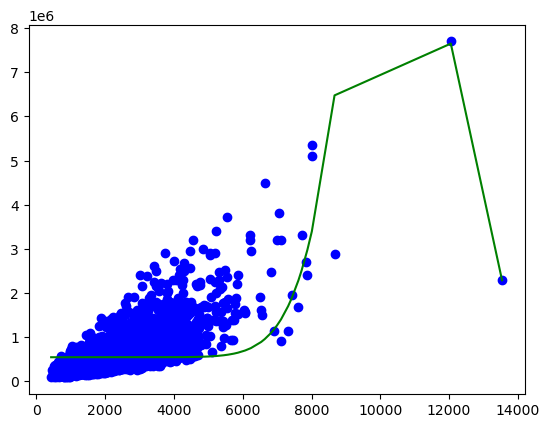

In [178]:
fig = plt.figure() 
plt.scatter(poly15_setdata1.power_1, poly15_setdata1.price, color='blue')
plt.plot(poly15_setdata1.power_1, regr.coef_[0][0]*poly15_setdata1.power_1 + regr.coef_[0][1]*poly15_setdata1.power_2  + regr.coef_[0][2]*poly15_setdata1.power_3 + regr.coef_[0][3]*poly15_setdata1.power_4+  regr.coef_[0][4]*poly15_setdata1.power_5 + regr.coef_[0][5]*poly15_setdata1.power_6 + regr.coef_[0][6]*poly15_setdata1.power_7 + regr.coef_[0][7]*poly15_setdata1.power_8 + regr.coef_[0][8]*poly15_setdata1.power_9 + regr.coef_[0][9]*poly15_setdata1.power_10 + regr.coef_[0][10]*poly15_setdata1.power_11 + regr.coef_[0][11]*poly15_setdata1.power_12 + regr.coef_[0][12]*poly15_setdata1.power_13 + regr.coef_[0][13]*poly15_setdata1.power_14 + regr.coef_[0][14]*poly15_setdata1.power_15 + regr.intercept_[0], '-g')

In [181]:
House_Sales_set2 = House_Sales_set2.sort_values(['sqft_living', 'price'])
poly15_setdata2 = polynomial_dataframe(House_Sales_set2['sqft_living'], 15)
poly15_setdata2['price'] = House_Sales_set2['price'] # add price to the data since it's the target
poly15_setdata2.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15,price
0,390,152100,59319000,23134410000,9022419900000,3518743761000000,1372310066790000000,535200926048100000000,208728361158759000000000,81404060851916010000000000,31747583732247243900000000000,12381557655576425121000000000000,4828807485674805797190000000000000,1883234919413174260904100000000000000,734461618571137961752599000000000000000,228000
1,410,168100,68921000,28257610000,11585620100000,4750104241000000,1947542738810000000,798492522912100000000,327381934393961000000000,134226593101524010000000000,55032903171624844100000000000,22563490300366186081000000000000,9251031023150136293210000000000000,3792922719491555880216100000000000000,1555098314991537910888601000000000000000,325000
2,420,176400,74088000,31116960000,13069123200000,5489031744000000,2305393332480000000,968265199641600000000,406671383849472000000000,170801981216778240000000000,71736832111046860800000000000,30129469486639681536000000000000,12654377184388666245120000000000000,5314838417443239822950400000000000000,2232232135326160725639168000000000000000,229050
3,420,176400,74088000,31116960000,13069123200000,5489031744000000,2305393332480000000,968265199641600000000,406671383849472000000000,170801981216778240000000000,71736832111046860800000000000,30129469486639681536000000000000,12654377184388666245120000000000000,5314838417443239822950400000000000000,2232232135326160725639168000000000000000,280000
4,440,193600,85184000,37480960000,16491622400000,7256313856000000,3192778096640000000,1404822362521600000000,618121839509504000000000,271973609384181760000000000,119668388129039974400000000000,52654090776777588736000000000000,23167799941782139043840000000000000,10193831974384141179289600000000000000,4485286068729022118887424000000000000000,290000


In [182]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(poly15_setdata2[['power_1','power_2','power_3','power_4','power_5','power_6','power_7','power_8','power_9','power_10','power_11','power_12','power_13','power_14','power_15']])
train_y = np.asanyarray(poly15_setdata2[['price']])
regr.fit(train_x,train_y)
print ('Coefficients:', regr.coef_)
print ('Intercept:', regr.intercept_)
print ('Power_1:', regr.coef_[0,0])
print ('Power_2:', regr.coef_[0,1])
print ('Power_3:', regr.coef_[0,2])
print ('Power_4:', regr.coef_[0,3])
print ('Power_5:', regr.coef_[0,4])
print ('Power_6:', regr.coef_[0,5])
print ('Power_7:', regr.coef_[0,6])
print ('Power_8:', regr.coef_[0,7])
print ('Power_9:', regr.coef_[0,8])
print ('Power_10:', regr.coef_[0,9])
print ('Power_11:', regr.coef_[0,10])
print ('Power_12:', regr.coef_[0,11])
print ('Power_13:', regr.coef_[0,12])
print ('Power_14:', regr.coef_[0,13])
print ('Power_15:', regr.coef_[0,14])

Coefficients: [[ 2.71335949e-77  7.33541090e-39 -1.85014814e-44  8.44628222e-50
   5.73786179e-71  1.51934987e-58  3.64549616e-55  1.50416258e-51
   5.76015665e-48  1.95770497e-44  5.39396539e-41  9.40376360e-38
  -3.63529141e-41  4.65476524e-45 -1.97199121e-49]]
Intercept: [506856.13162059]
Power_1: 2.7133594856639315e-77
Power_2: 7.335410903808718e-39
Power_3: -1.8501481426983013e-44
Power_4: 8.44628222307026e-50
Power_5: 5.737861793767737e-71
Power_6: 1.5193498713147913e-58
Power_7: 3.645496158266459e-55
Power_8: 1.5041625757857547e-51
Power_9: 5.760156649011795e-48
Power_10: 1.9577049735292163e-44
Power_11: 5.393965386437263e-41
Power_12: 9.403763603742854e-38
Power_13: -3.6352914142106e-41
Power_14: 4.654765238125951e-45
Power_15: -1.9719912093194184e-49


In [183]:
y_hat1_train = regr.predict(poly15_setdata2[['power_1','power_2','power_3','power_4','power_5','power_6','power_7','power_8','power_9','power_10','power_11','power_12','power_13','power_14','power_15']].values)
train_x = np.asanyarray(poly15_setdata2[['power_1','power_2','power_3','power_4','power_5','power_6','power_7','power_8','power_9','power_10','power_11','power_12','power_13','power_14','power_15']].values)
train_y = np.asanyarray(poly15_setdata2[['price']].values)
print("Residual sum of Squares: %.2f" % np.mean((y_hat1_train-train_y) ** 2))
print("Variance Score: %.2f" % regr.score(train_x,train_y))

Residual sum of Squares: 87079596550.44
Variance Score: 0.27


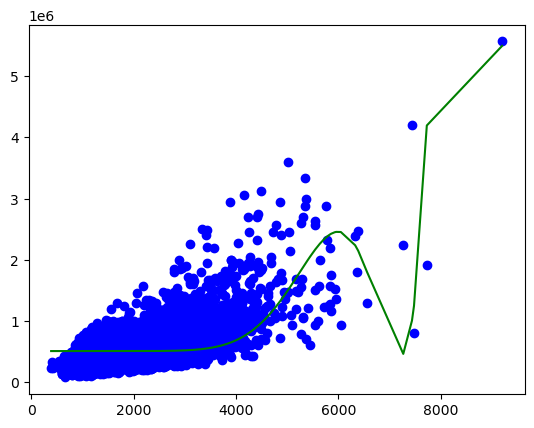

In [185]:
fig = plt.figure() 
plt.scatter(poly15_setdata2.power_1, poly15_setdata2.price, color='blue')
plt.plot(poly15_setdata2.power_1, regr.coef_[0][0]*poly15_setdata2.power_1 + regr.coef_[0][1]*poly15_setdata2.power_2  + regr.coef_[0][2]*poly15_setdata2.power_3 + regr.coef_[0][3]*poly15_setdata2.power_4+  regr.coef_[0][4]*poly15_setdata2.power_5 + regr.coef_[0][5]*poly15_setdata2.power_6 + regr.coef_[0][6]*poly15_setdata2.power_7 + regr.coef_[0][7]*poly15_setdata2.power_8 + regr.coef_[0][8]*poly15_setdata2.power_9 + regr.coef_[0][9]*poly15_setdata2.power_10 + regr.coef_[0][10]*poly15_setdata2.power_11 + regr.coef_[0][11]*poly15_setdata2.power_12 + regr.coef_[0][12]*poly15_setdata2.power_13 + regr.coef_[0][13]*poly15_setdata2.power_14 + regr.coef_[0][14]*poly15_setdata2.power_15 + regr.intercept_[0], '-g')

In [187]:
House_Sales_set3 = House_Sales_set3.sort_values(['sqft_living', 'price'])
poly15_setdata3 = polynomial_dataframe(House_Sales_set3['sqft_living'], 15)
poly15_setdata3['price'] = House_Sales_set3['price'] # add price to the data since it's the target
poly15_setdata3.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15,price
0,390,152100,59319000,23134410000,9022419900000,3518743761000000,1372310066790000000,535200926048100000000,208728361158759000000000,81404060851916010000000000,31747583732247243900000000000,12381557655576425121000000000000,4828807485674805797190000000000000,1883234919413174260904100000000000000,734461618571137961752599000000000000000,245000
1,480,230400,110592000,53084160000,25480396800000,12230590464000000,5870683422720000000,2817928042905600000000,1352605460594688000000000,649250621085450240000000000,311640298121016115200000000000,149587343098087735296000000000000,71801924687082112942080000000000000,34464923849799414212198400000000000000,16543163447903718821855232000000000000000,145000
2,480,230400,110592000,53084160000,25480396800000,12230590464000000,5870683422720000000,2817928042905600000000,1352605460594688000000000,649250621085450240000000000,311640298121016115200000000000,149587343098087735296000000000000,71801924687082112942080000000000000,34464923849799414212198400000000000000,16543163447903718821855232000000000000000,170000
3,520,270400,140608000,73116160000,38020403200000,19770609664000000,10280717025280000000,5345972853145600000000,2779905883635712000000000,1445551059490570240000000000,751686550935096524800000000000,390877006486250192896000000000000,203256043372850100305920000000000000,105693142553882052159078400000000000000,54960434128018667122720768000000000000000,262000
4,520,270400,140608000,73116160000,38020403200000,19770609664000000,10280717025280000000,5345972853145600000000,2779905883635712000000000,1445551059490570240000000000,751686550935096524800000000000,390877006486250192896000000000000,203256043372850100305920000000000000,105693142553882052159078400000000000000,54960434128018667122720768000000000000000,295000


In [188]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(poly15_setdata3[['power_1','power_2','power_3','power_4','power_5','power_6','power_7','power_8','power_9','power_10','power_11','power_12','power_13','power_14','power_15']])
train_y = np.asanyarray(poly15_setdata3[['price']])
regr.fit(train_x,train_y)
print ('Coefficients:', regr.coef_)
print ('Intercept:', regr.intercept_)
print ('Power_1:', regr.coef_[0,0])
print ('Power_2:', regr.coef_[0,1])
print ('Power_3:', regr.coef_[0,2])
print ('Power_4:', regr.coef_[0,3])
print ('Power_5:', regr.coef_[0,4])
print ('Power_6:', regr.coef_[0,5])
print ('Power_7:', regr.coef_[0,6])
print ('Power_8:', regr.coef_[0,7])
print ('Power_9:', regr.coef_[0,8])
print ('Power_10:', regr.coef_[0,9])
print ('Power_11:', regr.coef_[0,10])
print ('Power_12:', regr.coef_[0,11])
print ('Power_13:', regr.coef_[0,12])
print ('Power_14:', regr.coef_[0,13])
print ('Power_15:', regr.coef_[0,14])

Coefficients: [[ 2.83751934e-88 -7.80224128e-49 -1.38770849e-55 -3.98272978e-59
   1.57170169e-72  4.27894908e-69  2.68009626e-65  1.63911362e-61
   9.66435015e-58  5.38044653e-54  2.72563636e-50  1.16253248e-46
   3.33756141e-43 -6.76238818e-47  3.43132932e-51]]
Intercept: [530874.31665334]
Power_1: 2.8375193407185e-88
Power_2: -7.802241283100604e-49
Power_3: -1.3877084872480603e-55
Power_4: -3.982729777831131e-59
Power_5: 1.5717016931002878e-72
Power_6: 4.278949076150349e-69
Power_7: 2.680096260178185e-65
Power_8: 1.6391136244795617e-61
Power_9: 9.664350149653116e-58
Power_10: 5.38044653216674e-54
Power_11: 2.7256363612655613e-50
Power_12: 1.1625324793673208e-46
Power_13: 3.33756141347463e-43
Power_14: -6.762388179132014e-47
Power_15: 3.4313293205311174e-51


In [189]:
y_hat1_train = regr.predict(poly15_setdata3[['power_1','power_2','power_3','power_4','power_5','power_6','power_7','power_8','power_9','power_10','power_11','power_12','power_13','power_14','power_15']].values)
train_x = np.asanyarray(poly15_setdata3[['power_1','power_2','power_3','power_4','power_5','power_6','power_7','power_8','power_9','power_10','power_11','power_12','power_13','power_14','power_15']].values)
train_y = np.asanyarray(poly15_setdata3[['price']].values)
print("Residual sum of Squares: %.2f" % np.mean((y_hat1_train-train_y) ** 2))
print("Variance Score: %.2f" % regr.score(train_x,train_y))

Residual sum of Squares: 115251079453.18
Variance Score: 0.22


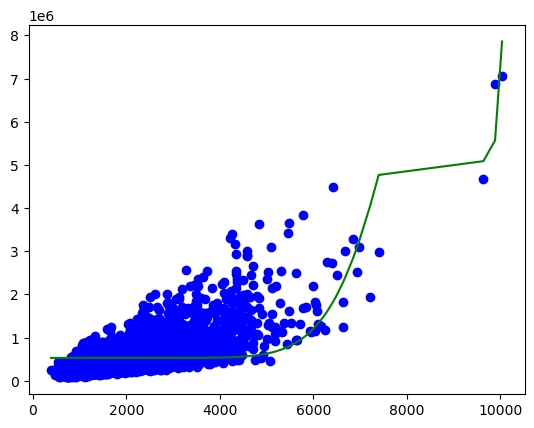

In [190]:
fig = plt.figure() 
plt.scatter(poly15_setdata3.power_1, poly15_setdata3.price, color='blue')
plt.plot(poly15_setdata3.power_1, regr.coef_[0][0]*poly15_setdata3.power_1 + regr.coef_[0][1]*poly15_setdata3.power_2  + regr.coef_[0][2]*poly15_setdata3.power_3 + regr.coef_[0][3]*poly15_setdata3.power_4+  regr.coef_[0][4]*poly15_setdata3.power_5 + regr.coef_[0][5]*poly15_setdata3.power_6 + regr.coef_[0][6]*poly15_setdata3.power_7 + regr.coef_[0][7]*poly15_setdata3.power_8 + regr.coef_[0][8]*poly15_setdata3.power_9 + regr.coef_[0][9]*poly15_setdata3.power_10 + regr.coef_[0][10]*poly15_setdata3.power_11 + regr.coef_[0][11]*poly15_setdata3.power_12 + regr.coef_[0][12]*poly15_setdata3.power_13 + regr.coef_[0][13]*poly15_setdata3.power_14 + regr.coef_[0][14]*poly15_setdata3.power_15 + regr.intercept_[0], '-g')

In [193]:
House_Sales_set4 = House_Sales_set4.sort_values(['sqft_living', 'price'])
poly15_setdata4 = polynomial_dataframe(House_Sales_set4['sqft_living'], 15)
poly15_setdata4['price'] = House_Sales_set4['price'] # add price to the data since it's the target
poly15_setdata4.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15,price
0,290,84100,24389000,7072810000,2051114900000,594823321000000,172498763090000000,50024641296100000000,14507145975869000000000,4207072333002010000000000,1220050976570582900000000000,353814783205469041000000000000,102606287129586021890000000000000,29755823267579946348100000000000000,8629188747598184440949000000000000000,142000
1,370,136900,50653000,18741610000,6934395700000,2565726409000000,949318771330000000,351247945392100000000,129961739795077000000000,48085843724178490000000000,17791762177946041300000000000,6582952005840035281000000000000,2435692242160813053970000000000000,901206129599500829968900000000000000,333446267951815307088493000000000000000,276000
2,380,144400,54872000,20851360000,7923516800000,3010936384000000,1144155825920000000,434779213849600000000,165216101262848000000000,62782118479882240000000000,23857205022355251200000000000,9065737908494995456000000000000,3444980405228098273280000000000000,1309092553986677343846400000000000000,497455170514937390661632000000000000000,245000
3,384,147456,56623104,21743271936,8349416423424,3206175906594816,1231171548132409344,472769874482845188096,181543631801412552228864,69712754611742420055883776,26769697770909089301459369984,10279563944029090291760398073856,3947352554507170672035992860360704,1515783380930753538061821258378510336,582060818277409358615739363217347969024,265000
4,470,220900,103823000,48796810000,22934500700000,10779215329000000,5066231204630000000,2381128666176100000000,1119130473102767000000000,525991322358300490000000000,247215921508401230300000000000,116191483108948578241000000000000,54609997061205831773270000000000000,25666698618766740933436900000000000000,12063348350820368238715343000000000000000,156000


In [194]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(poly15_setdata4[['power_1','power_2','power_3','power_4','power_5','power_6','power_7','power_8','power_9','power_10','power_11','power_12','power_13','power_14','power_15']])
train_y = np.asanyarray(poly15_setdata4[['price']])
regr.fit(train_x,train_y)
print ('Coefficients:', regr.coef_)
print ('Intercept:', regr.intercept_)
print ('Power_1:', regr.coef_[0,0])
print ('Power_2:', regr.coef_[0,1])
print ('Power_3:', regr.coef_[0,2])
print ('Power_4:', regr.coef_[0,3])
print ('Power_5:', regr.coef_[0,4])
print ('Power_6:', regr.coef_[0,5])
print ('Power_7:', regr.coef_[0,6])
print ('Power_8:', regr.coef_[0,7])
print ('Power_9:', regr.coef_[0,8])
print ('Power_10:', regr.coef_[0,9])
print ('Power_11:', regr.coef_[0,10])
print ('Power_12:', regr.coef_[0,11])
print ('Power_13:', regr.coef_[0,12])
print ('Power_14:', regr.coef_[0,13])
print ('Power_15:', regr.coef_[0,14])

Coefficients: [[ 1.37116050e-76  2.79678221e-40 -2.13063863e-44 -2.19910713e-49
   2.58420337e-70  5.29002498e-58  1.27070046e-54  4.87868972e-51
   1.73549022e-47  5.47058320e-44  1.39587599e-40  2.25041871e-37
  -9.43954119e-41  1.31573060e-44 -6.09163430e-49]]
Intercept: [494819.1848721]
Power_1: 1.3711604987173929e-76
Power_2: 2.796782208370941e-40
Power_3: -2.1306386258227746e-44
Power_4: -2.1991071328637065e-49
Power_5: 2.5842033695353443e-70
Power_6: 5.2900249811749666e-58
Power_7: 1.2707004611832174e-54
Power_8: 4.878689722055742e-51
Power_9: 1.7354902153004641e-47
Power_10: 5.470583200890369e-44
Power_11: 1.3958759921218604e-40
Power_12: 2.2504187100351063e-37
Power_13: -9.439541188838001e-41
Power_14: 1.315730601662384e-44
Power_15: -6.091634299290858e-49


In [195]:
y_hat1_train = regr.predict(poly15_setdata4[['power_1','power_2','power_3','power_4','power_5','power_6','power_7','power_8','power_9','power_10','power_11','power_12','power_13','power_14','power_15']].values)
train_x = np.asanyarray(poly15_setdata4[['power_1','power_2','power_3','power_4','power_5','power_6','power_7','power_8','power_9','power_10','power_11','power_12','power_13','power_14','power_15']].values)
train_y = np.asanyarray(poly15_setdata4[['price']].values)
print("Residual sum of Squares: %.2f" % np.mean((y_hat1_train-train_y) ** 2))
print("Variance Score: %.2f" % regr.score(train_x,train_y))

Residual sum of Squares: 83484300740.72
Variance Score: 0.30


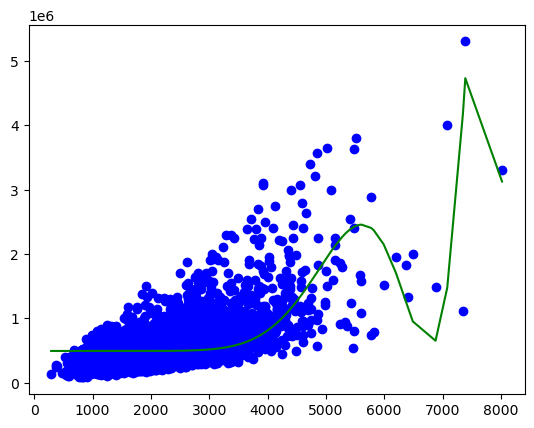

In [197]:
fig = plt.figure() 
plt.scatter(poly15_setdata4.power_1, poly15_setdata4.price, color='blue')
plt.plot(poly15_setdata4.power_1, regr.coef_[0][0]*poly15_setdata4.power_1 + regr.coef_[0][1]*poly15_setdata4.power_2  + regr.coef_[0][2]*poly15_setdata4.power_3 + regr.coef_[0][3]*poly15_setdata4.power_4 +  regr.coef_[0][4]*poly15_setdata4.power_5 + regr.coef_[0][5]*poly15_setdata4.power_6 + regr.coef_[0][6]*poly15_setdata4.power_7 + regr.coef_[0][7]*poly15_setdata4.power_8 + regr.coef_[0][8]*poly15_setdata4.power_9 + regr.coef_[0][9]*poly15_setdata4.power_10 + regr.coef_[0][10]*poly15_setdata4.power_11 + regr.coef_[0][11]*poly15_setdata4.power_12 + regr.coef_[0][12]*poly15_setdata4.power_13 + regr.coef_[0][13]*poly15_setdata4.power_14 + regr.coef_[0][14]*poly15_setdata4.power_15 + regr.intercept_[0], '-g')

# Author
Mohammadreza Arabshahi

## Other Contributors
Manu Zhang
